<a href="https://colab.research.google.com/github/JJFelix/prediction-models/blob/master/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

In [ ]:
stroke = pd.DataFrame()

stroke = pd.read_csv('./stroke.csv')

stroke.head()
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data = stroke
data.drop(['id'], axis=1, inplace=True)

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum() /data.shape[0]) * 100
print(f'Percentage of missing data: {round(total_percentage, 2)}%')

Percentage of missing data: 3.93%


In [ ]:
# missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
bmi,201,3.933464


In [ ]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


**Change gender, ever_married, work_type, residence, smoking_status to numerical values**

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


<ipython-input-10-28956f241dd2>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


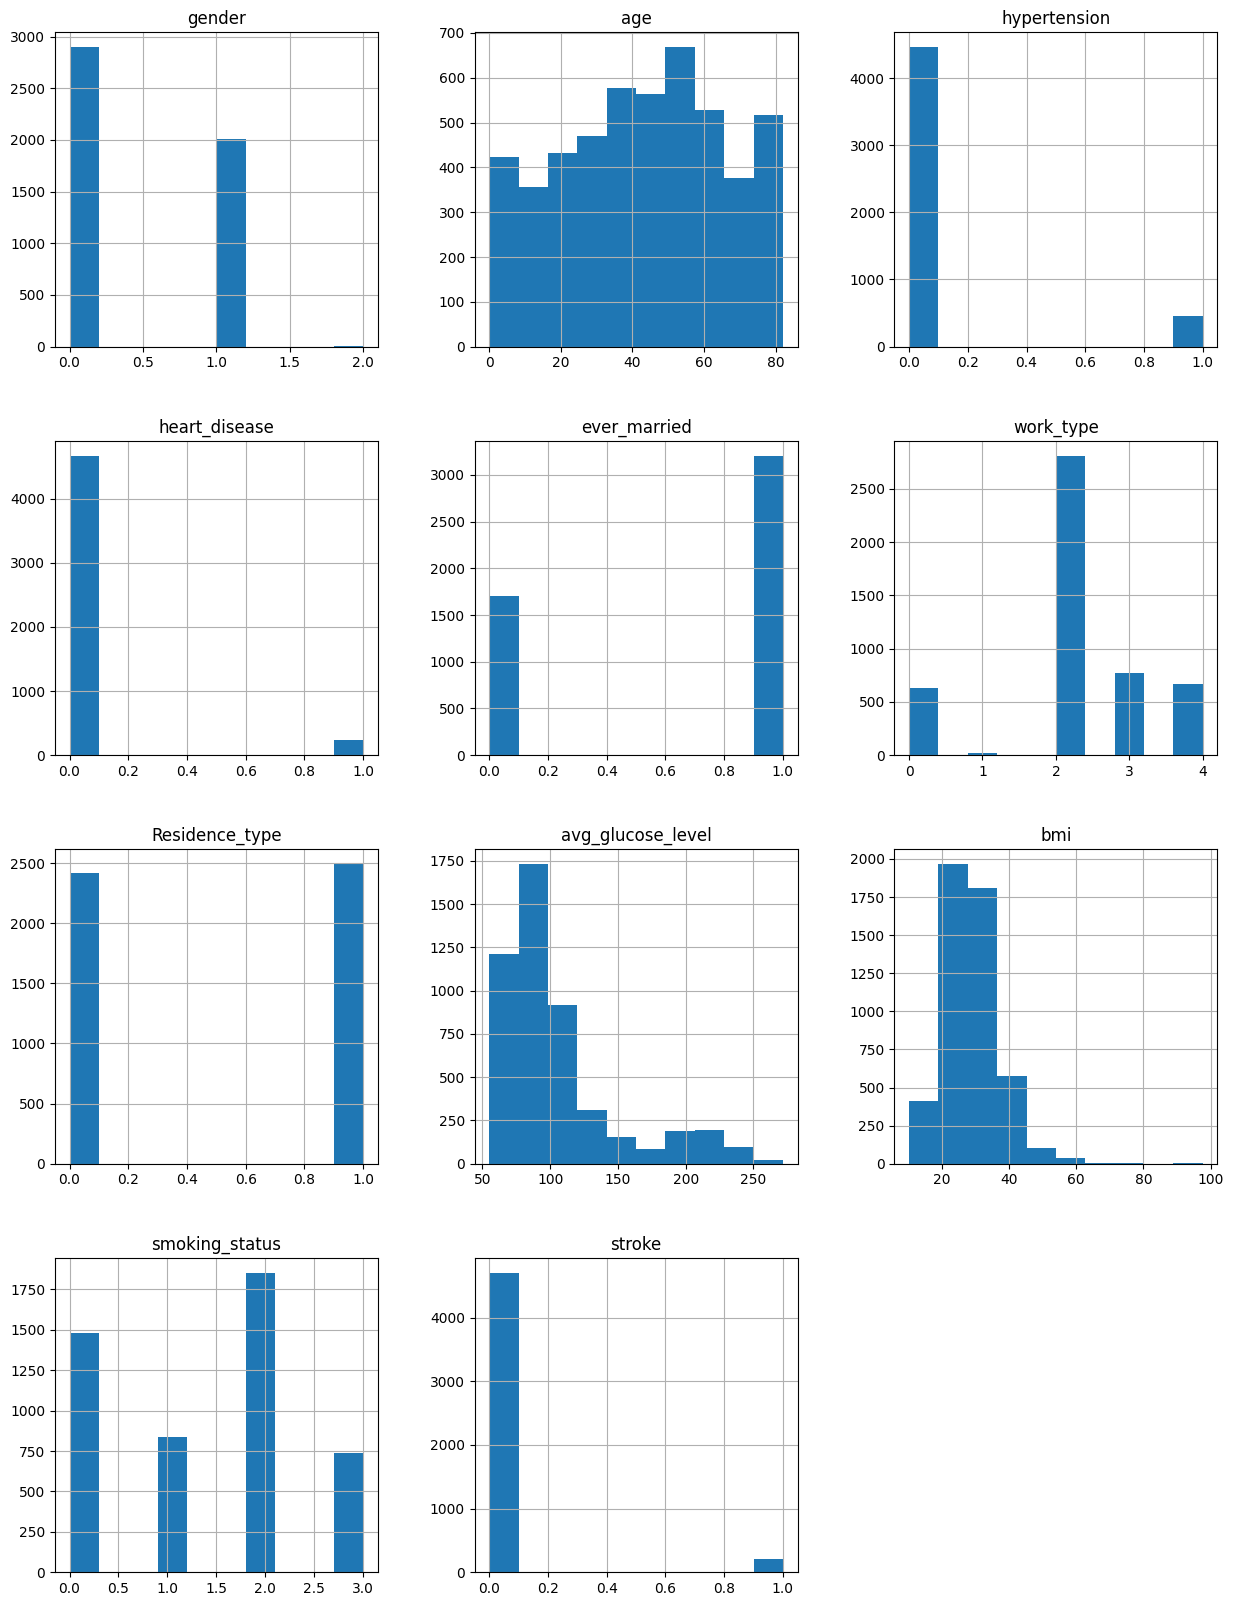

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [ ]:
# print(f"There are {cases[0]} patients without diabetes and {cases[1]} patients with prediabetes and {cases[2]} with diabetes")

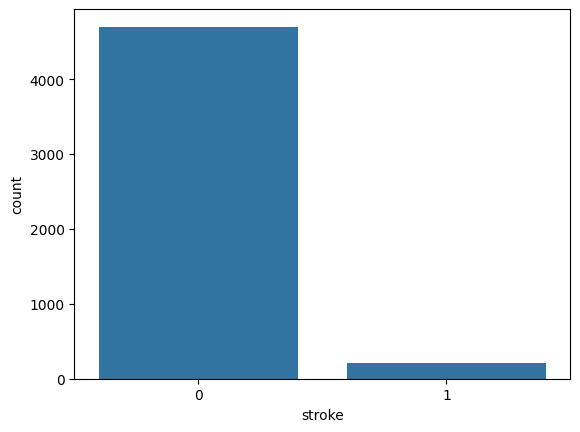

There are 4700 patients without stroke and 209 patients with the disease


In [ ]:
import seaborn as sns

sns.countplot(x='stroke',data=data)
plt.show()
cases = data.stroke.value_counts()
print(f"There are {cases[0]} patients without stroke and {cases[1]} patients with the disease")

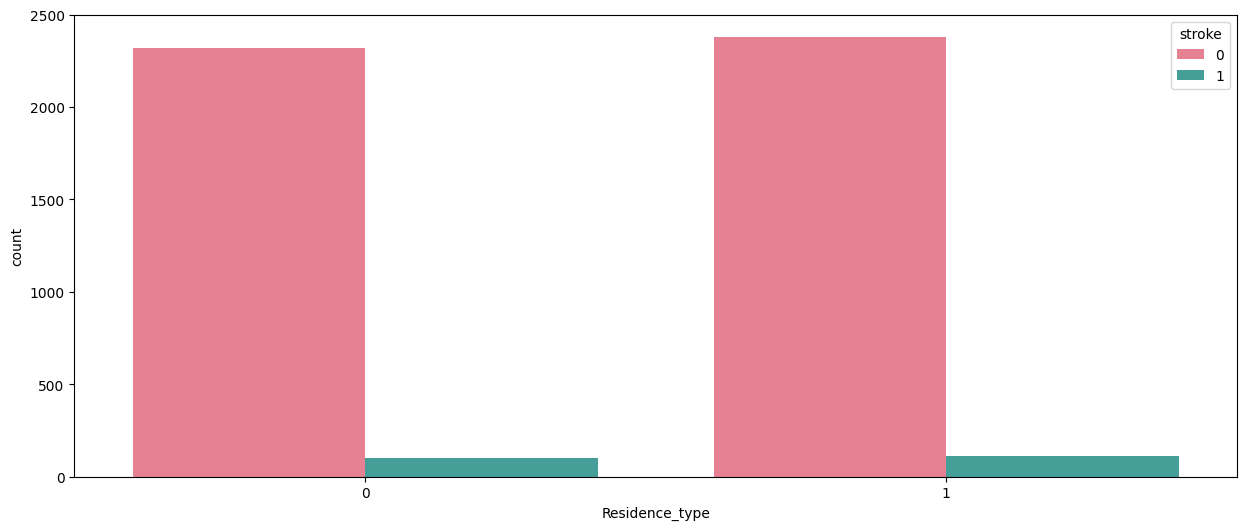

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Residence_type',data = data, hue = 'stroke',palette='husl')
plt.show()

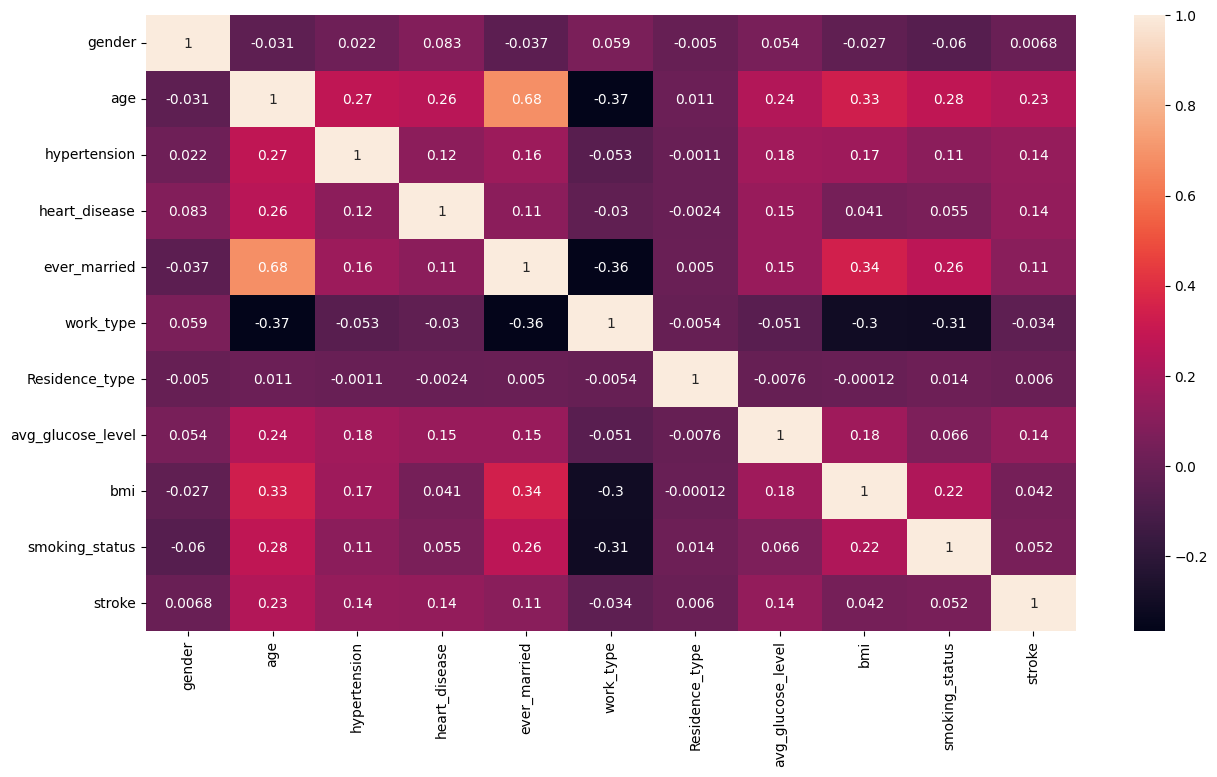

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
%matplotlib inline

!pip install Boruta

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE
from boruta import BorutaPy

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	7


BorutaPy

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7AB3439EFB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7AB3439EFB40, verbose=2)

In [ ]:
# most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'avg_glucose_level', 'bmi']

In [ ]:
# select the top 9 features
top_features = data.columns[:-1][feat_selector.ranking_ <=10].tolist()
top_features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
import statsmodels.api as sm

X_top = data[top_features]
y = data['stroke']

res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.163844
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4899
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 0.06929
Time:                        07:49:48   Log-Likelihood:                -804.31
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 1.493e-21
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.1712      0.146     -1.170      0.242      -0.458       0.116
age                   0.0380      0.004      9.009      0.000       0.030       0.046
hypertension          1.0035      0.179      5.613      0.000       0.653       1.354
heart_disease         0.7994      0.213      3.752      0.000       0.382       1.217
ever_married         -0.4318      0.199     -2.175      0.030      -0.821      -0.043
work_type            -0.4555      0.057     -8.034      0.000      -0.567      -0.344
Residence_type       -0.3044      0.138     -2.200      0.028      -0.575      -0.033
avg_glucose_level     0.0023      0.001      1.678      0.093      -0.000       0.005
bmi                  -0.1365      0.010    -13.980      0.000      -0.156      -0.117
smoking_status       -0.1329      0.070     -1.892      0.058      -0.271       0.005
=====================================================================================
"""

**Training and Test Sets**

In [ ]:
X = data[top_features]
y = data.iloc[:,-1]

**Smote**

In [ ]:
# the numbers before smote
num_before = dict(Counter(y))

# smoting
# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

#the numbers after smote
num_after =dict(Counter(y_smote))

print(num_before, num_after)

{1: 209, 0: 4700} {0: 4700, 1: 3760}


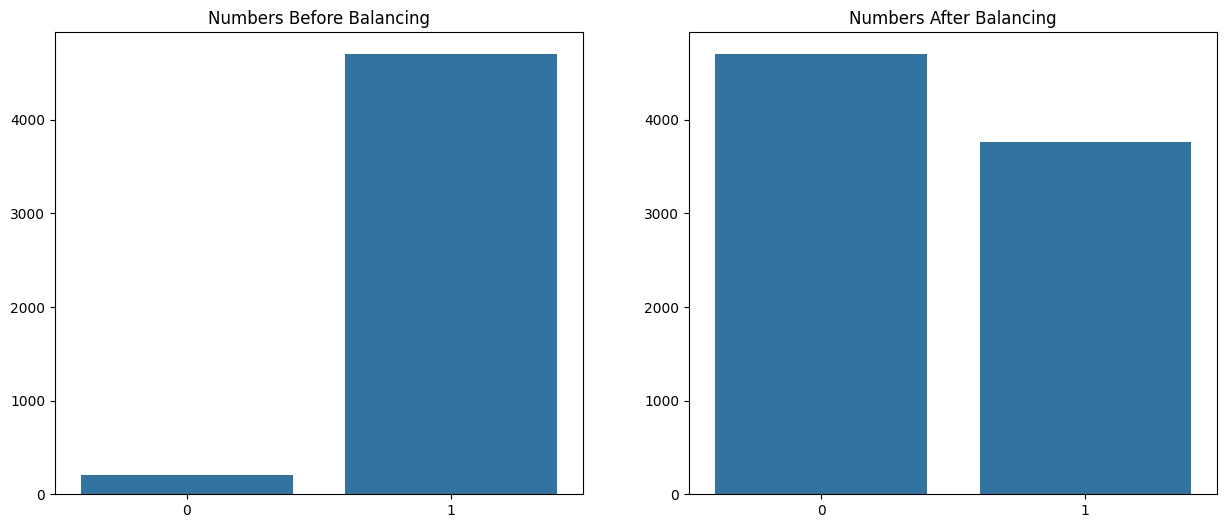

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
# new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
new_data.columns =  [
    'gender',
    'age',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'Residence_type',
    'avg_glucose_level',
    'bmi',
    'smoking_status',
    'stroke'
]
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,0,2,1,94.26,23.7,0,0
1,0,62.0,1,0,1,0,0,77.04,34.7,2,0
2,0,61.0,0,0,1,2,1,114.09,25.7,2,0
3,0,3.0,0,0,0,4,0,68.34,18.0,0,0
4,1,65.0,0,0,1,2,1,58.87,36.6,2,0


In [ ]:
X_new = new_data[top_features]
y_new = new_data.iloc[:,-1]
X_new.head()
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=.2, random_state=42)

In [ ]:
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

X_test.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.697022,1.083175,-0.307882,-0.224956,0.636186,0.000746,-0.83696,-0.973267,-0.654996,-0.341708
1,1.432751,0.534575,-0.307882,-0.224956,0.636186,0.000746,-0.83696,1.352442,1.161227,0.704754
2,1.432751,0.160108,-0.307882,-0.224956,-1.571868,-2.019200,-0.83696,-0.499302,1.258556,1.751216
3,-0.697022,0.061262,-0.307882,-0.224956,0.636186,-1.009227,-0.83696,-0.869956,0.034933,0.704754
4,-0.697022,-0.367359,-0.307882,-0.224956,0.636186,-2.019200,1.19480,-0.260571,-1.275603,0.704754


**Models**

**Bagged Decision Trees**

In [ ]:
dt = BaggingClassifier(estimator=DecisionTreeClassifier())

# grid search for optimum parameters
params = {
    # 'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
    # 'base_estimator__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    # 'base_estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    # 'n_estimators': [10, 50, 100, 200]  # Number of base estimators (trees) in the ensemble
    'n_estimators': [10, 50, 100, 200],
    'base_estimator__max_depth': [None] + list(np.arange(10, 31, 5)),
    'base_estimator__min_samples_split': list(np.arange(2, 16)),
    'base_estimator__min_samples_leaf': list(np.arange(1, 12)),
    'max_features': [0.5, 0.75, 1.0],  # Fraction of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]
}
n_iter_search = 100
bagged_dt = RandomizedSearchCV(estimator=dt, param_distributions=params, n_iter=n_iter_search, cv=5, n_jobs=-1)

In [ ]:
bagged_dt.fit(X_train, y_train)
bagged_dt.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


{'n_estimators': 50,
 'max_features': 0.5,
 'bootstrap_features': True,
 'bootstrap': False,
 'base_estimator__min_samples_split': 7,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__max_depth': None}

In [ ]:
# predictions
bagged_dt_predict = bagged_dt.predict(X_test)

# accuracy and f1
bagged_dt_accuracy = accuracy_score(y_test, bagged_dt_predict)
bagged_dt_f1 = f1_score(y_test, bagged_dt_predict)

print(f"Bagged Decision Trees accuracy: {round(bagged_dt_accuracy*100,2)}%")
print(f'The f1 score for BDT is {round(bagged_dt_f1*100,2)}%')

Bagged Decision Trees accuracy: 96.81%
The f1 score for BDT is 96.32%


<Axes: >

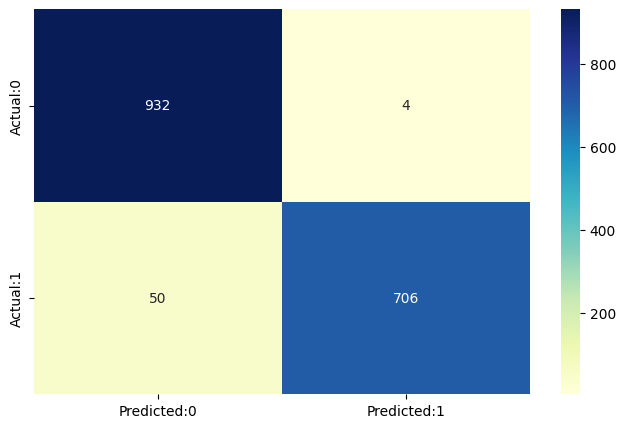

In [ ]:
# confusion matrix
cm=confusion_matrix(y_test, bagged_dt_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,bagged_dt_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       936
           1       0.99      0.93      0.96       756

    accuracy                           0.97      1692
   macro avg       0.97      0.96      0.97      1692
weighted avg       0.97      0.97      0.97      1692



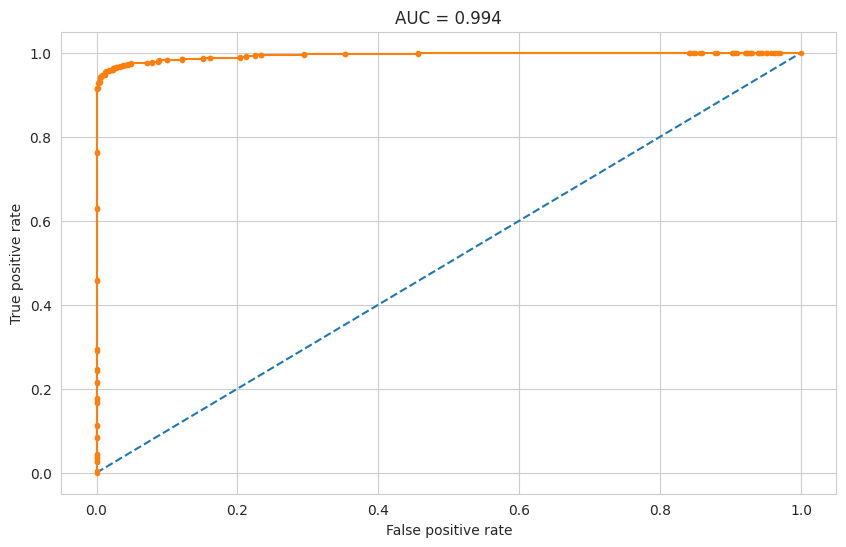

In [ ]:
# ROC and AUC
# ROC curve and AUC
probs = bagged_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bagged_dt_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(bagged_dt_auc,3)}")
plt.show()

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

# grid search for optimum parameters
params = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
n_iter_search = 100
rf_clf = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=n_iter_search, cv=5, n_jobs=-1)

In [ ]:
rf_clf.fit(X_train, y_train)
rf_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
# predictions
rf_predict = rf_clf.predict(X_test)

# accuracy and f1
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_f1 = f1_score(y_test, rf_predict)

print(f"RandomForest accuracy: {round(rf_accuracy*100,2)}%")
print(f'The f1 score for RF is {round(rf_f1*100,2)}%')

RandomForest accuracy: 93.44%
The f1 score for RF is 92.82%


<Axes: >

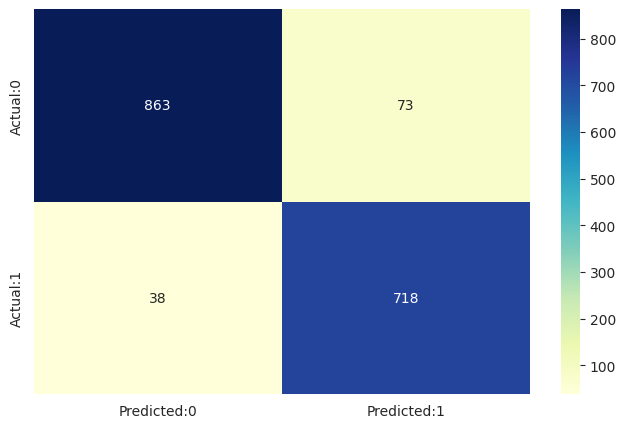

In [ ]:
# confusion matrix
cm=confusion_matrix(y_test, rf_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
# classification report
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       936
           1       0.91      0.95      0.93       756

    accuracy                           0.93      1692
   macro avg       0.93      0.94      0.93      1692
weighted avg       0.94      0.93      0.93      1692



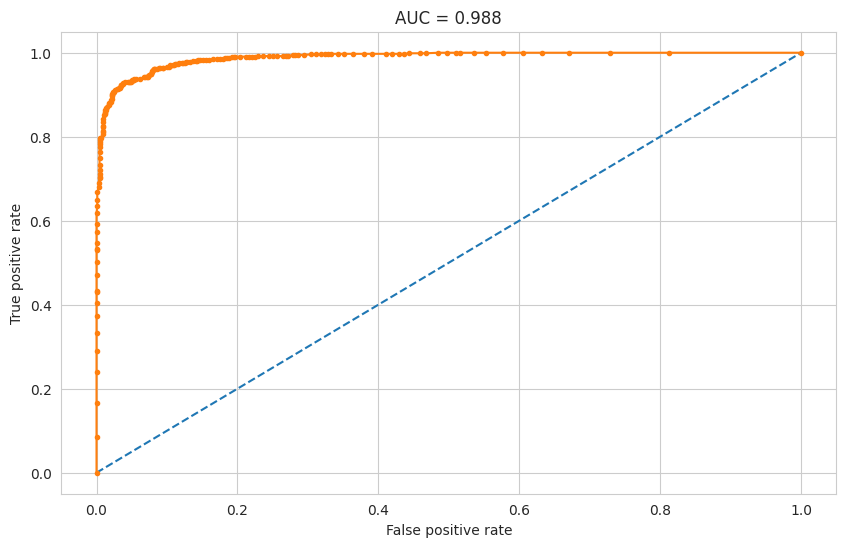

In [ ]:
# ROC and AUC
# ROC curve and AUC
probs = rf_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc,3)}")
plt.show()

**Stochastic Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier()

# Define the parameter grid
params = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': list(np.arange(2, 16)),
    'min_samples_leaf': list(np.arange(1, 12)),
    'max_features': [0.5, 0.75, 1.0],
    'subsample': [0.5, 0.75, 1.0]
}

n_iter_search = 100

gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=params, n_iter=n_iter_search, cv=5, n_jobs=-1)

In [ ]:
# Train the model
gb_clf.fit(X_train, y_train)
gb_clf.best_params_

{'subsample': 0.75,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 1.0,
 'max_depth': 5,
 'learning_rate': 0.2}

In [ ]:
# predictions
gb_predict = gb_clf.predict(X_test)

# accuracy and f1
gb_accuracy = accuracy_score(y_test, gb_predict)
gb_f1 = f1_score(y_test, gb_predict)

print(f"SGB accuracy: {round(gb_accuracy*100,2)}%")
print(f'The f1 score for gb is {round(gb_f1*100,2)}%')

SGB accuracy: 95.45%
The f1 score for gb is 94.96%


<Axes: >

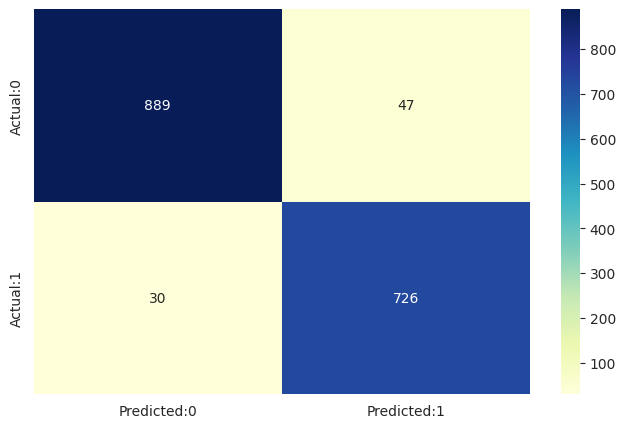

In [ ]:
# confusion matrix
cm=confusion_matrix(y_test, gb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
# classification report
print(classification_report(y_test,gb_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       936
           1       0.94      0.96      0.95       756

    accuracy                           0.95      1692
   macro avg       0.95      0.96      0.95      1692
weighted avg       0.95      0.95      0.95      1692



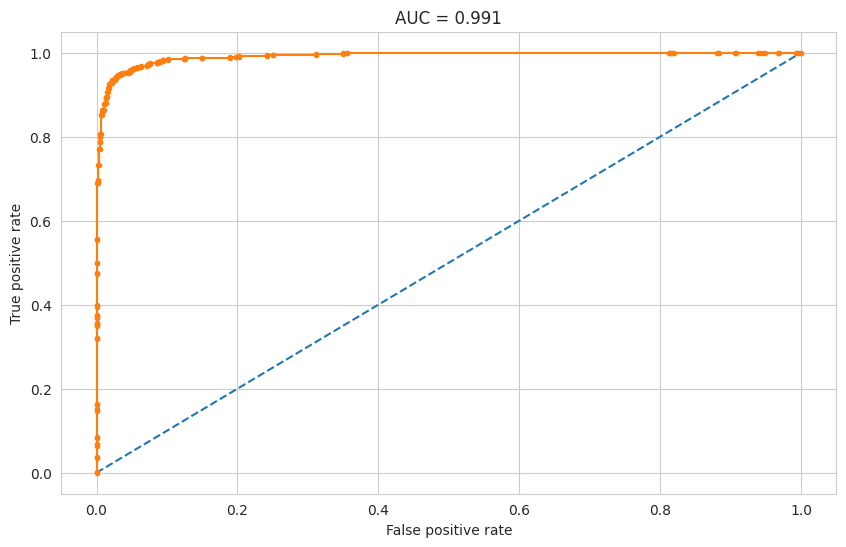

In [ ]:
# ROC and AUC
# ROC curve and AUC
probs = gb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(gb_auc,3)}")
plt.show()

**Ensemble**

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('bagged_tree', bagged_dt),
        ('random_forest', rf_clf),
        ('gradient_boosting', gb_clf)
    ], voting='soft')

ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('bagged_tree',
                              RandomizedSearchCV(cv=5,
                                                 estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
                                                 n_iter=100, n_jobs=-1,
                                                 param_distributions={'base_estimator__max_depth': [None,
                                                                                                    10,
                                                                                                    15,
                                                                                                    20,
                                                                                                    25,
                                                                                                    30],
                                                                      'base_estimator__min_samples_leaf': [1,
                                                                                                           2,
                                                                                                           3,
                                                                                                           4,
                                                                                                           5,
                                                                                                           6,
                                                                                                           7,
                                                                                                           8,
                                                                                                           9,
                                                                                                           10,
                                                                                                           11],
                                                                      'base_estimator__min_samples_split': [2,
                                                                                                            3,
                                                                                                            4,
                                                                                                            5,
                                                                                                            6,
                                                                                                            7,
                                                                                                            8,
                                                                                                            9,
                                                                                                            10,
                                                                                                            11,
                                                                                                            12,
                                                                                                            13,...
                              RandomizedSearchCV(cv=5,
                                                 estimator=GradientBoostingClassifier(),
                                                 n_iter=100, n_jobs=-1,
                                                 param_distributions={'learning_rate': [0.01,
                                                                                        0.05,
                                                                                        0.1,
                                      

In [ ]:
# predictions
ensemble_predict = ensemble.predict(X_test)

# accuracy and f1
ensemble_accuracy = accuracy_score(y_test, ensemble_predict)
ensemble_f1 = f1_score(y_test, ensemble_predict)

print(f"ensemble accuracy: {round(ensemble_accuracy*100,2)}%")
print(f'The f1 score for ensemble is {round(ensemble_f1*100,2)}%')

ensemble accuracy: 95.8%
The f1 score for ensemble is 95.34%


In [ ]:
# predict probabilities
proba_scores = ensemble.predict_proba(X_test)
print(proba_scores)
# print(y_test)

[[0.13807268 0.86192732]
 [0.17933832 0.82066168]
 [0.73799086 0.26200914]
 ...
 [0.64477957 0.35522043]
 [0.27548096 0.72451904]
 [0.24781488 0.75218512]]


In [ ]:
# ['HighBP',  'HighChol',  'BMI',  'Smoker',  'HeartDiseaseorAttack',
#  'Fruits',  'DiffWalk',  'Sex',  'Age',   'Diabetes_binary']
# patient_data = [[1, 1, 25, 0, 1, 1, 0, 0, 9]]
# scaled_patient_data = scaler.transform(patient_data)
# scaled_patient_data_2d = np.array(scaled_patient_data).reshape(1,-1)
# scaled_patient_data_2d
# proba_scores = ensemble.predict_proba(scaled_patient_data_2d)

# print("Probability score for class 1(risk score): ", proba_scores[0][1])

In [ ]:
import pickle, joblib
file_path = 'stroke_ensemble_model.pkl'

with open(file_path, 'wb') as file:
  pickle.dump(ensemble, file)

# using joblib
joblib.dump(ensemble, "stroke_ensemble_model.joblib", compress=3)

print('Ensemble model saved successfully')

Ensemble model saved successfully
